In [13]:
# Importing necessary modules
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar100, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


CIFAR 100 using Network architecture from Lab2

In [109]:

N_EPOCH = 40 
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 32, 32
N_CLASSES = 100  
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 3) 

In [110]:

(X_train, y_train), (X_test, y_test) = cifar100.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, N_CLASSES)
y_test = to_categorical(y_test, N_CLASSES)

In [80]:

def adjusted_LeNet(input_shape, classes):
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes))
    model.add(Activation('softmax'))


    return model

In [81]:

model = adjusted_LeNet(INPUT_SHAPE, N_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

In [82]:

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/40
313/313 [==============================] - 14s 42ms/step - loss: 4.1345 - accuracy: 0.0677 - val_loss: 3.6216 - val_accuracy: 0.1499
Epoch 2/40
313/313 [==============================] - 13s 42ms/step - loss: 3.4681 - accuracy: 0.1749 - val_loss: 3.0898 - val_accuracy: 0.2524
Epoch 3/40
313/313 [==============================] - 13s 41ms/step - loss: 3.0981 - accuracy: 0.2411 - val_loss: 2.8079 - val_accuracy: 0.3066
Epoch 4/40
313/313 [==============================] - 13s 41ms/step - loss: 2.8688 - accuracy: 0.2840 - val_loss: 2.6625 - val_accuracy: 0.3369
Epoch 5/40
313/313 [==============================] - 13s 41ms/step - loss: 2.6971 - accuracy: 0.3178 - val_loss: 2.6028 - val_accuracy: 0.3500
Epoch 6/40
313/313 [==============================] - 13s 42ms/step - loss: 2.5548 - accuracy: 0.3457 - val_loss: 2.4976 - val_accuracy: 0.3658
Epoch 7/40
313/313 [==============================] - 13s 41ms/step - loss: 2.4226 - accuracy: 0.3731 - val_loss: 2.4109 - val_accuracy:

In [85]:
# Evaluating the model
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])

79/79 [==============================] - 1s 12ms/step - loss: 2.3848 - accuracy: 0.4414
Test score: 2.384819984436035
Test accuracy: 0.4413999915122986


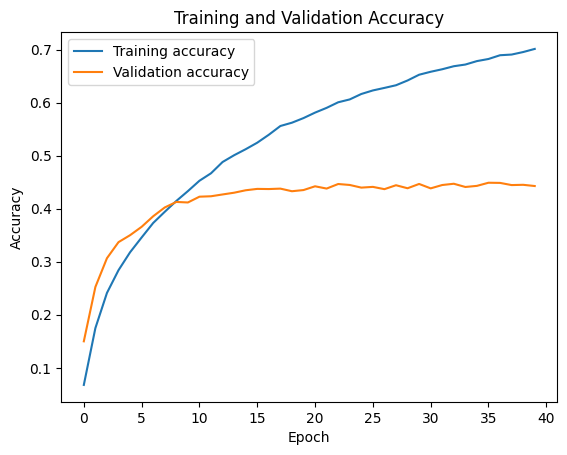

In [86]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Adding Batch Normalization to the network

In [176]:
# Setting up parameters
N_EPOCH = 40  # Increased epochs for more complex data
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 32, 32  # CIFAR-100 images are 32x32
N_CLASSES = 100  # CIFAR-100 has 100 classes
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 3)  # CIFAR-100 images are color (3 channels)
# Loading and preparing the CIFAR-100 dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, N_CLASSES)
y_test = to_categorical(y_test, N_CLASSES)

In [163]:
def Added_BatchNormalization(input_shape, classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.55)) 
    
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.55))  
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.55))  
    model.add(Dense(classes))
    model.add(Activation('softmax'))

    return model

In [167]:
# Compiling the model
model = Added_BatchNormalization(INPUT_SHAPE, N_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

In [168]:
# Training the model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/40
313/313 [==============================] - 19s 55ms/step - loss: 4.1607 - accuracy: 0.0867 - val_loss: 4.7443 - val_accuracy: 0.0357
Epoch 2/40
313/313 [==============================] - 17s 53ms/step - loss: 3.4630 - accuracy: 0.1747 - val_loss: 3.2561 - val_accuracy: 0.2202
Epoch 3/40
313/313 [==============================] - 17s 53ms/step - loss: 3.1573 - accuracy: 0.2280 - val_loss: 3.0981 - val_accuracy: 0.2480
Epoch 4/40
313/313 [==============================] - 17s 54ms/step - loss: 2.9356 - accuracy: 0.2693 - val_loss: 2.7435 - val_accuracy: 0.3155
Epoch 5/40
313/313 [==============================] - 17s 53ms/step - loss: 2.7729 - accuracy: 0.3000 - val_loss: 2.8366 - val_accuracy: 0.3009
Epoch 6/40
313/313 [==============================] - 17s 53ms/step - loss: 2.6357 - accuracy: 0.3275 - val_loss: 2.6862 - val_accuracy: 0.3256
Epoch 7/40
313/313 [==============================] - 17s 54ms/step - loss: 2.5250 - accuracy: 0.3485 - val_loss: 2.4359 - val_accuracy:

In [169]:
# Evaluating the model
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])
model.summary()

79/79 [==============================] - 1s 17ms/step - loss: 2.0300 - accuracy: 0.4728
Test score: 2.0299911499023438
Test accuracy: 0.47279998660087585
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_125 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_64 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_173 (Activation  (None, 32, 32, 32)        0         
 )                                                               
                                                                 
 conv2d_126 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_65 (Ba  (N

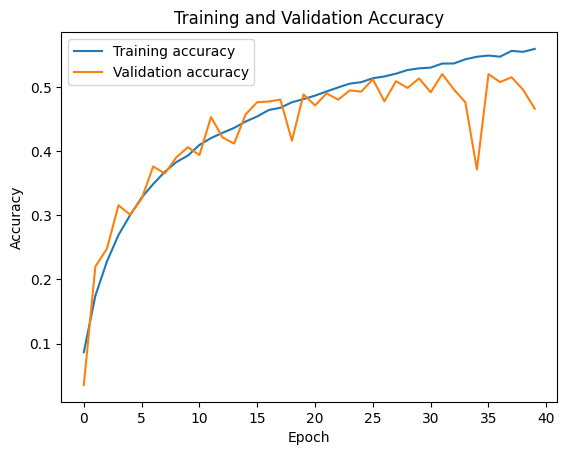

In [170]:
# Evaluating the model
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])
model.summary()
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

LeoTungAnh's network, consisting of more convolution layers and filters. A much larger network

In [175]:
model = Sequential()
 
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_139 (Conv2D)         (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization_79 (Ba  (None, 32, 32, 256)       1024      
 tchNormalization)                                               
                                                                 
 activation_190 (Activation  (None, 32, 32, 256)       0         
 )                                                               
                                                                 
 conv2d_140 (Conv2D)         (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_80 (Ba  (None, 32, 32, 256)       1024      
 tchNormalization)                                               
                                                     

In [177]:

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])
# Training the model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/40
313/313 [==============================] - 625s 2s/step - loss: 4.1003 - accuracy: 0.0832 - val_loss: 5.2913 - val_accuracy: 0.0184
Epoch 2/40
313/313 [==============================] - 619s 2s/step - loss: 3.2604 - accuracy: 0.2061 - val_loss: 3.4685 - val_accuracy: 0.1768
Epoch 3/40
313/313 [==============================] - 619s 2s/step - loss: 2.6080 - accuracy: 0.3212 - val_loss: 3.2317 - val_accuracy: 0.2329
Epoch 4/40
313/313 [==============================] - 619s 2s/step - loss: 2.2093 - accuracy: 0.4021 - val_loss: 2.6128 - val_accuracy: 0.3482
Epoch 5/40
313/313 [==============================] - 619s 2s/step - loss: 1.8981 - accuracy: 0.4751 - val_loss: 2.1816 - val_accuracy: 0.4260
Epoch 6/40
313/313 [==============================] - 619s 2s/step - loss: 1.6697 - accuracy: 0.5307 - val_loss: 2.6057 - val_accuracy: 0.3759
Epoch 7/40
313/313 [==============================] - 659s 2s/step - loss: 1.4492 - accuracy: 0.5852 - val_loss: 2.4842 - val_accuracy: 0.3848

79/79 [==============================] - 46s 577ms/step - loss: 3.0387 - accuracy: 0.5555
Test score: 3.03871488571167
Test accuracy: 0.5554999709129333
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_139 (Conv2D)         (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization_79 (Ba  (None, 32, 32, 256)       1024      
 tchNormalization)                                               
                                                                 
 activation_190 (Activation  (None, 32, 32, 256)       0         
 )                                                               
                                                                 
 conv2d_140 (Conv2D)         (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_80 (Ba  (No

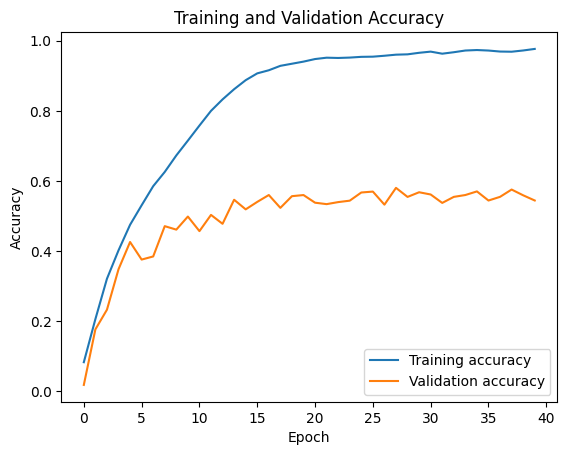

In [178]:
# Evaluating the model
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])
model.summary()
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Last and best network

In [8]:
# Setting up parameters
N_EPOCH = 40  
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 32, 32  
N_CLASSES = 100  
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 3)  

(X_train, y_train), (X_test, y_test) = cifar100.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, N_CLASSES)
y_test = to_categorical(y_test, N_CLASSES)

In [9]:
model = Sequential()
 
model.add(Conv2D(64,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 8, 8, 128)      │             

 Total params: 2,762,660 (10.54 MB)

 Trainable params: 2,759,332 (10.53 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [10]:
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])
# Training the model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 189ms/step - accuracy: 0.0505 - loss: 4.5633 - val_accuracy: 0.0247 - val_loss: 5.0199
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - accuracy: 0.1585 - loss: 3.5490 - val_accuracy: 0.2024 - val_loss: 3.3096
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - accuracy: 0.2350 - loss: 3.0974 - val_accuracy: 0.2879 - val_loss: 2.8356
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - accuracy: 0.3007 - loss: 2.7257 - val_accuracy: 0.3233 - val_loss: 2.6764
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - accuracy: 0.3450 - loss: 2.5039 - val_accuracy: 0.2948 - val_loss: 2.8538
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - accuracy: 0.3786 - loss: 2.3588 - val_accuracy: 0.3649 - val_loss: 2.5144
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - accuracy: 0.3998 - loss: 2.2465 - val_accuracy: 0.4134 - val_loss: 2.2006
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step - accuracy: 0.4270 - loss: 2

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5975 - loss: 1.5513
Test score: 1.5429139137268066
Test accuracy: 0.5942999720573425


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 8, 8, 128)      │             

 Total params: 8,281,326 (31.59 MB)

 Trainable params: 2,759,332 (10.53 MB)

 Non-trainable params: 3,328 (13.00 KB)

 Optimizer params: 5,518,666 (21.05 MB)

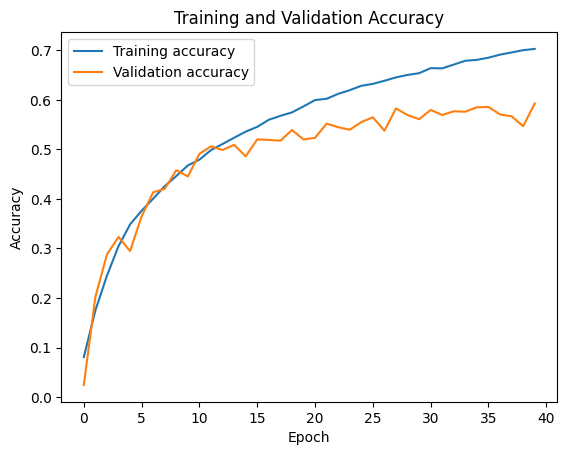

In [11]:
# Evaluating the model
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])
model.summary()
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Trying this last network on CIFAR 10

In [14]:
# Setting up parameters
N_EPOCH = 40  # Increased epochs for more complex data
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 32, 32  # CIFAR-100 images are 32x32
N_CLASSES = 100  # CIFAR-100 has 100 classes
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 3)  # CIFAR-100 images are color (3 channels)
# Loading and preparing the CIFAR-100 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, N_CLASSES)
y_test = to_categorical(y_test, N_CLASSES)

In [15]:
model = Sequential()
 
model.add(Conv2D(64,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 8, 8, 128)      │             

 Total params: 2,762,660 (10.54 MB)

 Trainable params: 2,759,332 (10.53 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [16]:
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])
# Training the model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 191ms/step - accuracy: 0.3169 - loss: 2.6435 - val_accuracy: 0.1019 - val_loss: 4.7673
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step - accuracy: 0.5588 - loss: 1.2323 - val_accuracy: 0.5754 - val_loss: 1.2069
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 187ms/step - accuracy: 0.6459 - loss: 0.9959 - val_accuracy: 0.6737 - val_loss: 0.9262
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 187ms/step - accuracy: 0.7019 - loss: 0.8404 - val_accuracy: 0.6695 - val_loss: 0.9130
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 187ms/step - accuracy: 0.7251 - loss: 0.7792 - val_accuracy: 0.6941 - val_loss: 0.8563
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 186ms/step - accuracy: 0.7500 - loss: 0.7019 - val_accuracy: 0.7703 - val_loss: 0.6409
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 187ms/step - accuracy: 0.7662 - loss: 0.6547 - val_accuracy: 0.7297 - val_loss: 0.7911
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 184ms/step - accuracy: 0.7782 - loss: 0

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8515 - loss: 0.5103
Test score: 0.5120612382888794
Test accuracy: 0.8521999716758728


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 8, 8, 128)      │             

 Total params: 8,281,326 (31.59 MB)

 Trainable params: 2,759,332 (10.53 MB)

 Non-trainable params: 3,328 (13.00 KB)

 Optimizer params: 5,518,666 (21.05 MB)

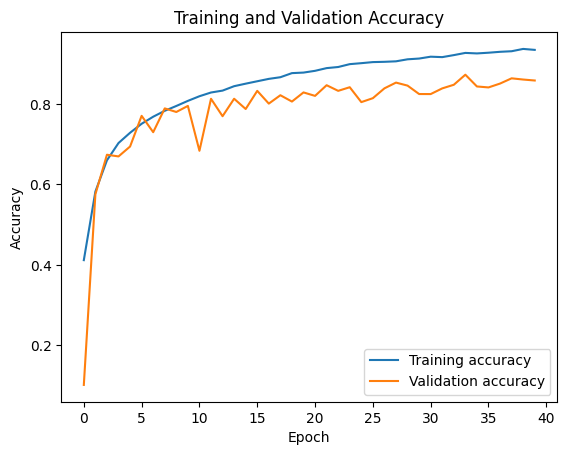

In [17]:
# Evaluating the model
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])
model.summary()
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()